In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mount your Google Drive (run this only once per session)
drive.mount('/content/drive')

# Path to the file in your Drive (replace with your actual folder structure)
file = pd.read_csv('/content/drive/MyDrive/insurance.csv')

# View the first few rows
file.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:

file.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:


filenull = file.isnull().sum()
filenullpercen = (filenull / len(file['age'])) * 100
print(filenullpercen)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64


In [ ]:
file['sex'].value_counts()

,count
sex,
male,676
female,662


In [ ]:
file['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
file['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


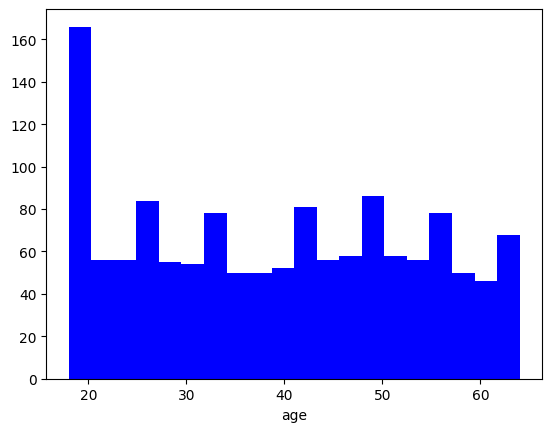

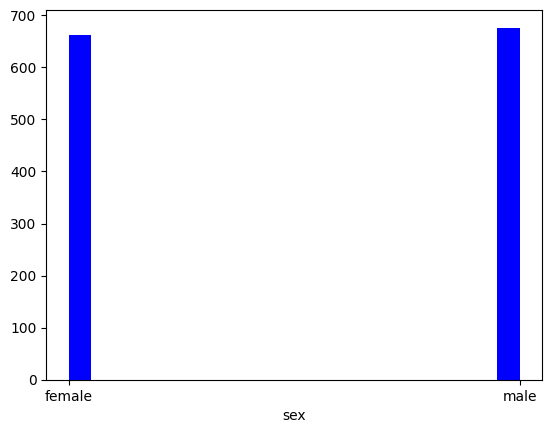

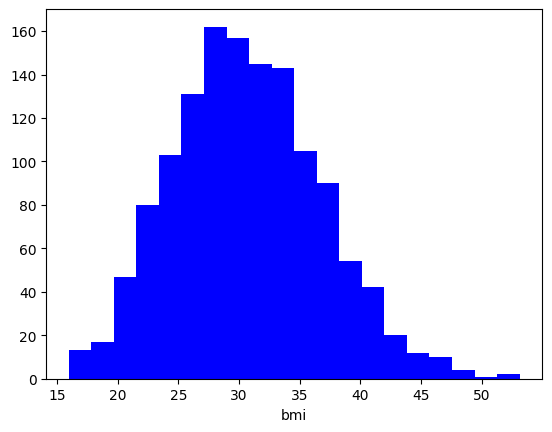

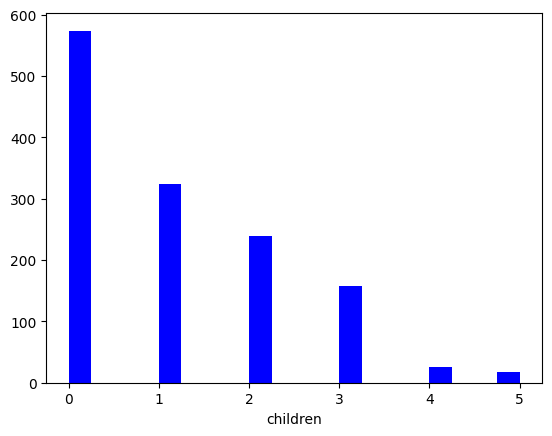

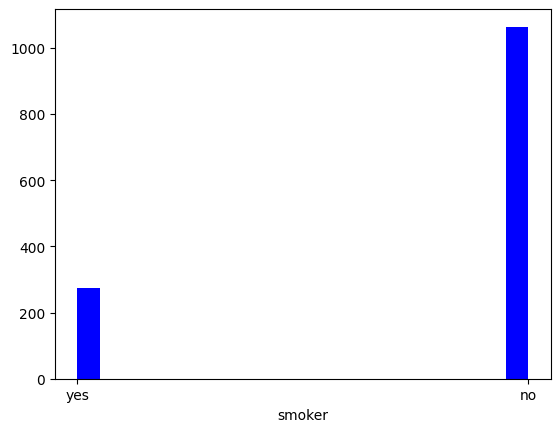

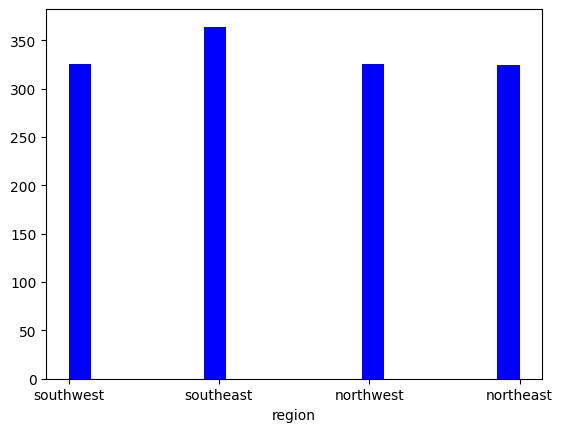

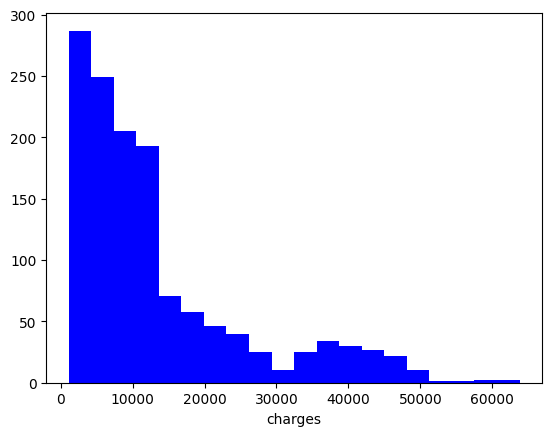

In [ ]:
features = ['age','sex',	'bmi'	,'children',	'smoker',	'region',	'charges']

for i in features:
  plt.xlabel(i)
  plt.hist(file[i], color='blue', bins=20)
  plt.show()

In [ ]:
features = ['age','charges']

for i in features:
    print(i)
    print(file[i].quantile(0.10))
    print(file[i].quantile(0.90))

    print('\n')

age
19.0
59.0


charges
2346.5336150000003
34831.7197




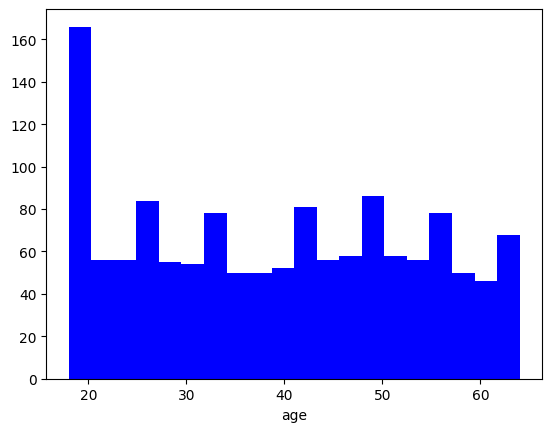

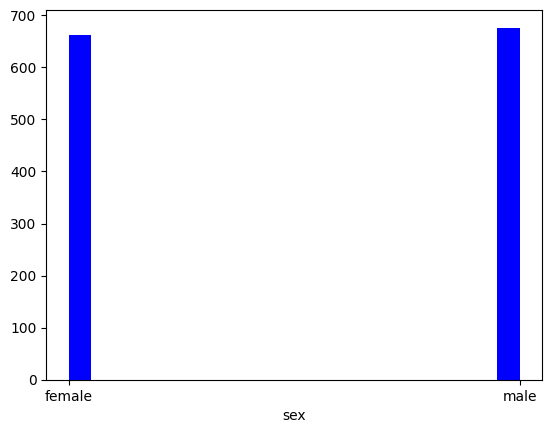

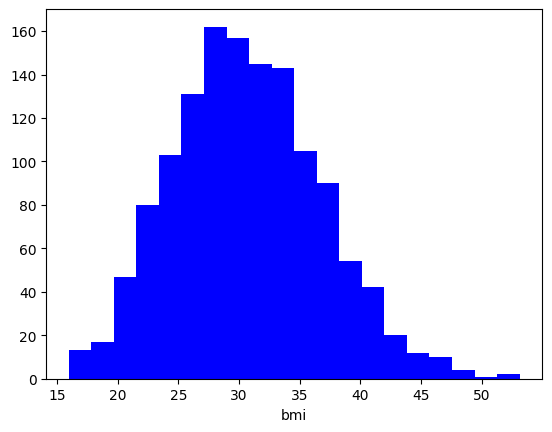

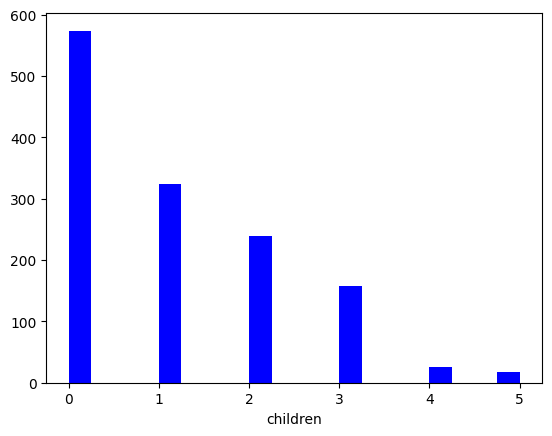

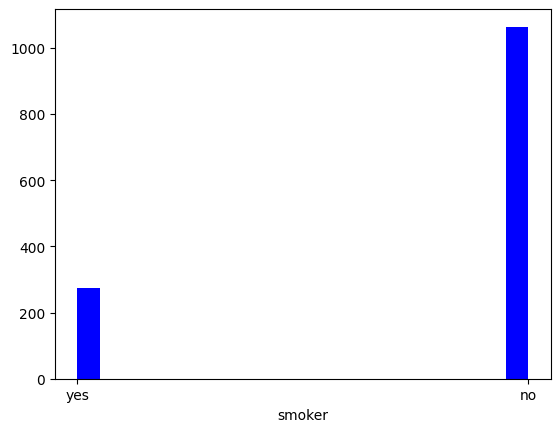

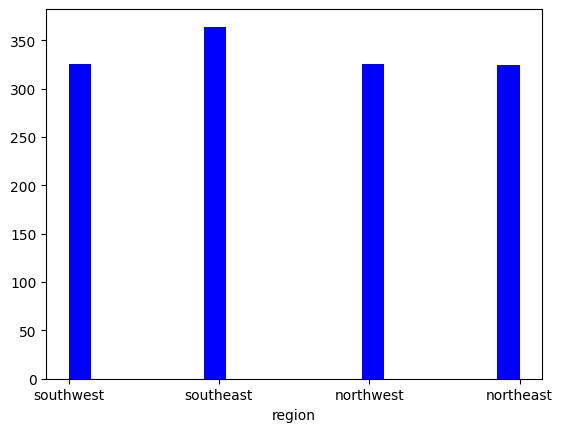

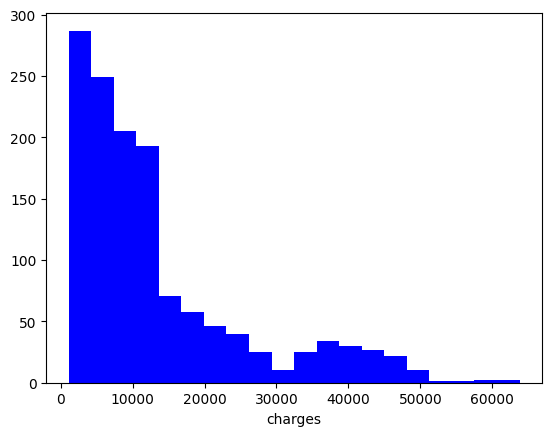

In [ ]:
features = ['age','sex',	'bmi'	,'children',	'smoker',	'region',	'charges']

for i in features:
  plt.xlabel(i)
  plt.hist(file[i], color='blue', bins=20)
  plt.show()

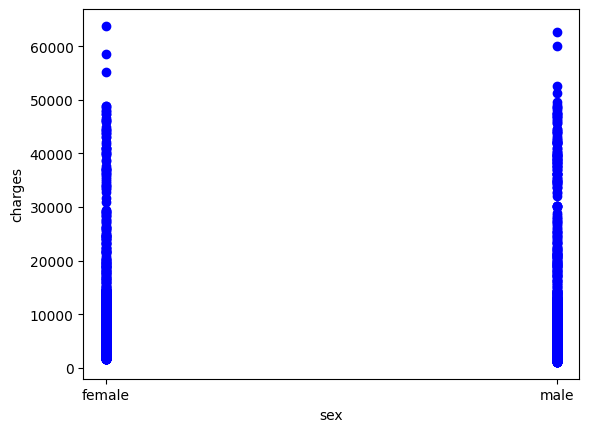

In [ ]:
sexfile = file['sex']
chargesfile = file['charges']

plt.scatter(sexfile,chargesfile, color='blue')

plt.xlabel('sex')
plt.ylabel('charges')

plt.show()

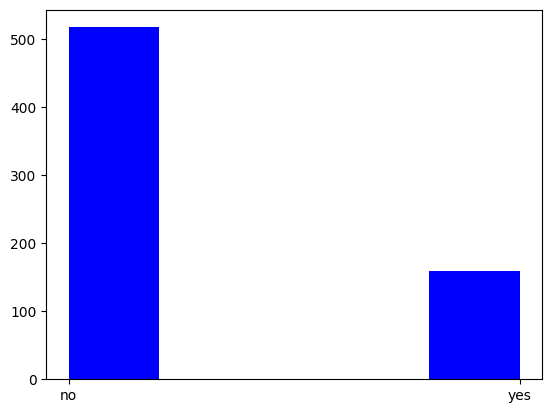

In [ ]:



malesmokerfile = file[file['sex'] == 'male']
malesmokerview = malesmokerfile['smoker']
plt.hist(malesmokerview, color='blue', bins=5)
plt.show()


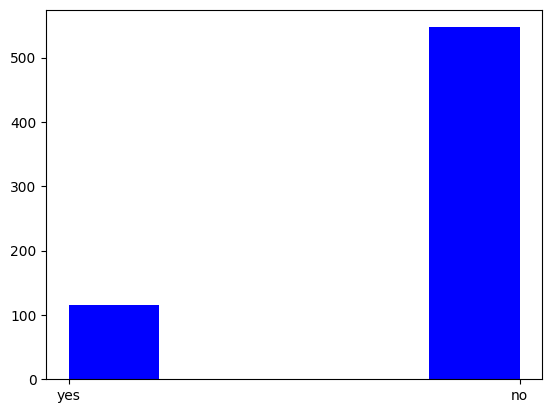

In [ ]:
femalesmokerfile = file[file['sex'] == 'female']
femalesmokerview = femalesmokerfile['smoker']
plt.hist(femalesmokerview, color='blue', bins=5)
plt.show()

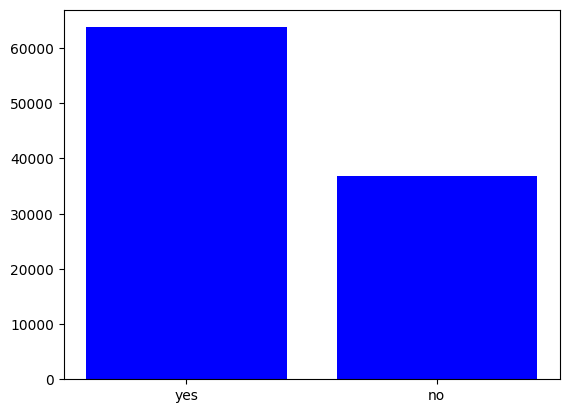

In [ ]:
file_x = file['smoker']
file_y = file['charges']

plt.bar(file_x, file_y, color='blue')

plt.show()

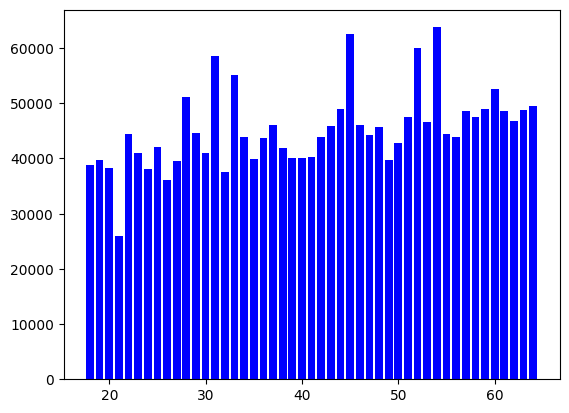

In [ ]:
file_x = file['age']
file_y = file['charges']

plt.bar(file_x, file_y, color='blue')

plt.show()

In [ ]:
file['sex'] = file['sex'].replace('male', 1)
file['sex'] = file['sex'].replace('female', 0)

file['smoker'] = file['smoker'].replace('yes', 1)
file['smoker'] = file['smoker'].replace('no', 0)

file['region'] = file['region'].replace('southwest', 1)
file['region'] = file['region'].replace('southeast', 2)
file['region'] = file['region'].replace('northwest', 3)
file['region'] = file['region'].replace('northeast', 4)


In [ ]:
y = file['charges']
x = file.drop(columns='charges')

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif, f_regression

selector = SelectKBest(f_regression, k=3)
x_train_new = selector.fit_transform(x_train, y_train)
x_test_new = selector.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train, y_train)

score = model.score(x_test, y_test)

print(score)

0.8461701913715061


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(x_train, y_train)

score = model.score(x_test, y_test)

print(score)

0.8588959533393549


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': range(1, 10),
    'min_samples_split': range(1, 12),
    'min_samples_leaf': range(1, 12),
}

model = GradientBoostingRegressor()

grid = GridSearchCV(model, params, cv=5, n_jobs=-1)

grid.fit(x_train_new, y_train)

# Access the best score using the appropriate attribute
print("Melhor nota:", grid.best_score_)
print("Melhor params:", grid.best_params_)



Melhor nota: 0.848925459268823
Melhor params: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 3}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
495 fits failed out of a total of 5445.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
495 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

In [90]:
from sklearn.ensemble import GradientBoostingRegressor


final_model = GradientBoostingRegressor(max_depth = 2, min_samples_leaf = 1, min_samples_split =  3)

final_model.fit(x_train_new, y_train)

score = final_model.score(x_test_new, y_test)

print(score)

0.8597717944667916


In [ ]:
import pickle
with open('insurance.pkl', 'wb') as file:
    pickle.dump(final_model, file)



In [ ]:
with open('insurance.pkl', 'rb') as f:
    testing_model = pickle.load(f)

In [ ]:
testing_model.fit(x_train, y_train)
previsao = testing_model.predict(x_test)
print(previsao)

[ 9989.78838187  6410.47936415 27506.43201374  9459.95379115
 35572.17300846  5844.84226039  2243.03888536 16083.98196029
  4548.81654832 11496.85664746 19248.13884554  7865.10176969
  5451.45278174 44932.40442197 46533.16052195 44967.2933718
 11548.37194425 44048.65477242  8927.7219275  23538.04296635
  5496.16957536  9012.43193299  1953.03663378  4703.82171355
 11551.63913404 12840.24489971 14957.68958749  6206.34615181
 11813.69791254  2422.08492611  7683.53295486 12284.18909792
  3533.85320981  5419.21220281  4970.52433107  9769.56645006
  3830.10825263  8694.71970223 27205.84751247 39671.05651722
  5249.89671073  4451.64950225 13753.78738115 14176.74434589
  7016.85771226 16314.49553334  5614.01237376  5365.85239054
 42521.89840904  6780.60739955 14872.19070265  3287.38193962
  8595.96927781  2552.30556363 12405.03795658 11931.03885351
  4822.92283299 38915.03239661 12526.43754811 12840.24489971
 14890.57682723  5736.15560272 17173.66862094  7895.07978985
 11457.78261999  5672.309